In [2]:
import pandas as pd



In [3]:
#cargar el archivo CSV y mostrar las primeras filas
df = pd.read_csv('sales_data_cleaned.csv')
df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,year_id
0,10107,30,95.70,2,2871.00,2003-02-24,shipped,1,1970-01-01 00:00:00.000000002,2003,...,level 3,nyc,ny,10022,usa,emea,yu,kwai,small,2003-01-01
1,10121,34,81.35,5,2765.90,2003-05-07,shipped,2,1970-01-01 00:00:00.000000005,2003,...,level 3,reims,ca,51100,france,emea,henriot,paul,small,2003-01-01
2,10134,41,94.74,2,3884.34,2003-07-01,shipped,3,1970-01-01 00:00:00.000000007,2003,...,level 3,paris,ca,75508,france,emea,da cunha,daniel,medium,2003-01-01
3,10145,45,83.26,6,3746.70,2003-08-25,shipped,3,1970-01-01 00:00:00.000000008,2003,...,level 3,pasadena,ca,90003,usa,emea,young,julie,medium,2003-01-01
4,10159,49,100.00,14,5205.27,2003-10-10,shipped,4,1970-01-01 00:00:00.000000010,2003,...,level 3,san francisco,ca,28034,usa,emea,brown,julie,medium,2003-01-01


In [4]:
# features de validacion de las ventas totales
validacion_ventas_total = df["quantityordered"].round(2) * df["priceeach"].round(2)
df["validacion_ventas_total"] = validacion_ventas_total

In [5]:
#feature de diferencia entre ventas reales y ventas validadas
diferencia_ventas = df["validacion_ventas_total"] - df["sales"]
df["diferencia_ventas"] = diferencia_ventas

In [6]:
# Mostrar las primeras filas para verificar las nuevas columnas agregadas
print(df[["sales", "validacion_ventas_total", "diferencia_ventas"]].head().round(2))

     sales  validacion_ventas_total  diferencia_ventas
0  2871.00                  2871.00               0.00
1  2765.90                  2765.90              -0.00
2  3884.34                  3884.34              -0.00
3  3746.70                  3746.70               0.00
4  5205.27                  4900.00            -305.27


# Interpretacion de Features validacion de venta
La feature "validacion_ventas_total" se creó para verificar la precisión de los datos de ventas registrados en el conjunto de datos. Al calcular el total de ventas como el producto de la cantidad ordenada y el precio por unidad, podemos comparar este valor con la columna original de ventas. Si ambos valores coinciden, esto indica que los datos son consistentes y confiables. Esta validación es crucial para asegurar que cualquier análisis o modelo predictivo basado en estos datos sea preciso y útil para la toma de decisiones empresariales.

In [7]:
#sumatoria de diferencia de ventas redondeada a 2 decimales
total_diferencia_ventas = df["diferencia_ventas"].sum().round(2)
print(f"\nSumatoria de la diferencia de ventas: {total_diferencia_ventas}")


Sumatoria de la diferencia de ventas: -1741742.06


# interpretacion del total diferencia de ventas
La sumatoria de la diferencia de ventas: -1,741,742.06 , eso muestra que las ventas reales son mayores que las ventas validadas en esa cantidad. Esto puede indicar posibles errores en los datos de ventas, como registros duplicados, errores de entrada o discrepancias en los cálculos. Es importante investigar más a fondo para identificar la causa de esta diferencia y corregir cualquier problema en los datos para asegurar su precisión y confiabilidad en futuros análisis y decisiones empresariales.


In [8]:
# Crear la columna 'periodo_id' combinando 'year_id' y 'qtr_id' 
# Esto sirve para generar un identificador único de cada periodo (año-trimestre)
# lo cual facilita el análisis temporal, agrupaciones y visualizaciones de tendencias.
# La fórmula utilizada es: periodo_id = year_id * 10 + qtr_id
# Por ejemplo, para el año 2020 y el primer trimestre (qtr_id=1), el periodo_id sería 20201.
# Esto permite un fácil ordenamiento y referencia de los periodos en análisis futuros.
periodo_id = df["year_id"] * 10 + df["qtr_id"]
df["periodo_id"] = periodo_id

print(df[["year_id", "qtr_id", "periodo_id"]].head())

   year_id  qtr_id  periodo_id
0     2003       1       20031
1     2003       2       20032
2     2003       3       20033
3     2003       3       20033
4     2003       4       20034


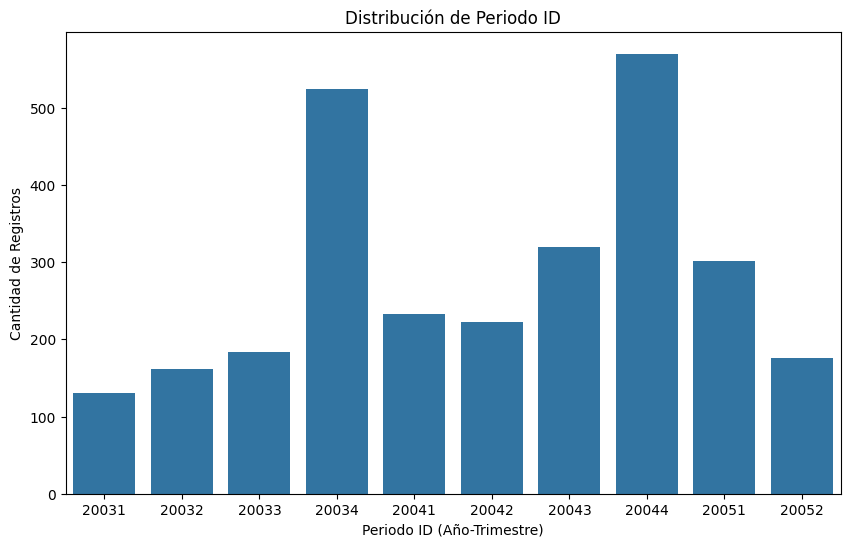

In [9]:

# Visualización de la distribución de 'periodo_id'
import seaborn as sns
import matplotlib.pyplot as plt
# Visualizar la distribución de 'periodo_id' usando un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='periodo_id', data=df)
plt.title('Distribución de Periodo ID')
plt.xlabel('Periodo ID (Año-Trimestre)')
plt.ylabel('Cantidad de Registros')
plt.show()



# interpretacion del grafico por barra

Verificamos que la empresa tiene mayor venta en los meses de abrir de cada año.   
Esto puede ser por campañas de marketing, ofertas especiales o comportamiento estacional de los clientes que impulsan las ventas en esos meses específicos.

# Interpretacion de Feature periodo_id
La feature "periodo_id" se creó para facilitar el análisis temporal de los datos de ventas. Al combinar el año y el trimestre en un solo identificador, podemos agrupar y ordenar fácilmente los datos por periodos específicos. Esto es especialmente útil para identificar tendencias estacionales, comparar el rendimiento entre diferentes trimestres y realizar análisis de series temporales. El "periodo_id" permite una referencia clara y concisa de cada periodo, lo que mejora la eficiencia en el análisis y la visualización de los datos a lo largo del tiempo.

In [10]:
#ratios para entedener descuentos por margenes
df["ratio_discount_priceeach"] = df["msrp"] / df["priceeach"]
print(df[["msrp", "priceeach", "ratio_discount_priceeach"]].head().round(2))

   msrp  priceeach  ratio_discount_priceeach
0    95      95.70                      0.99
1    95      81.35                      1.17
2    95      94.74                      1.00
3    95      83.26                      1.14
4    95     100.00                      0.95


# Interpretacion de Feature ratio_discount_priceeach
La feature "ratio_discount_priceeach" se creó para evaluar el impacto de los descuentos en el precio unitario de los productos vendidos. Al calcular la proporción entre el precio con descuento y el precio original, podemos identificar qué tan significativos son los descuentos aplicados. Un ratio cercano a 1 indica que el descuento es pequeño, mientras que un ratio menor sugiere un descuento más considerable. Esta información es valiosa para analizar cómo los descuentos afectan las ventas y la rentabilidad, permitiendo a la empresa ajustar sus estrategias de precios y promociones de manera más efectiva, un ratio mayor a 1 indica un error en los datos. ya que el precio con descuento no puede ser mayor que el precio original.

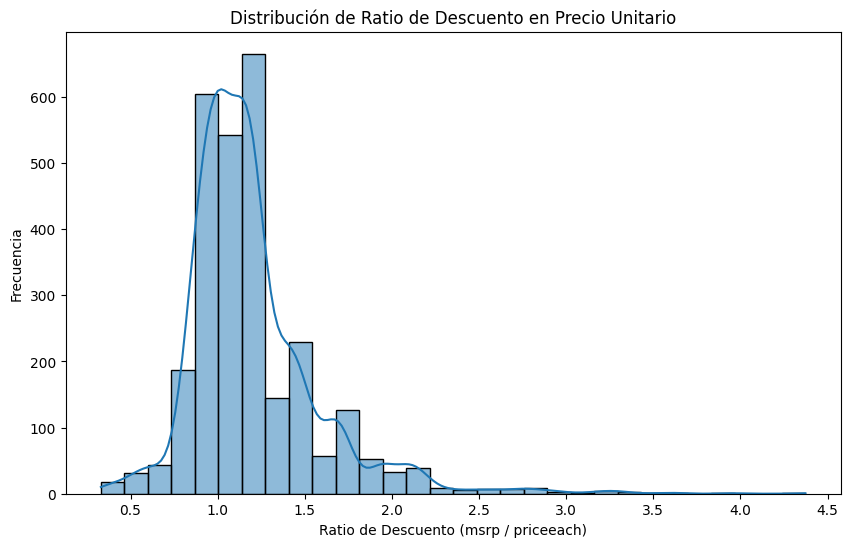

In [11]:
# grafico de la distribucion de ratio_discount_priceeach
plt.figure(figsize=(10, 6))
sns.histplot(df["ratio_discount_priceeach"], bins=30, kde=True)
plt.title('Distribución de Ratio de Descuento en Precio Unitario')
plt.xlabel('Ratio de Descuento (msrp / priceeach)')
plt.ylabel('Frecuencia')
plt.show()

# interpretacion del grafico de la distribucion de ratio_discount_priceeach
El gráfico de distribución del "ratio_discount_priceeach" muestra cómo se distribuyen los descuentos aplicados a los productos vendidos. La mayoría de los valores se agrupan alrededor de 1, lo que indica que muchos productos tienen descuentos pequeños o nulos. Sin embargo, hay una cola hacia la izquierda, lo que sugiere que algunos productos tienen descuentos significativos. Esta distribución es útil para entender el comportamiento de precios y descuentos en el mercado, permitiendo a la empresa identificar patrones y ajustar sus estrategias de descuento para maximizar las ventas y la rentabilidad.

de 0.5 indica a 0.99 muestra que varios productos se vendieron casi al doble de los precios sugeridos, lo que puede reflejar una estrategia de precios premium o una alta demanda para esos productos específicos.

de 1.0 es nuestro ideal, ya que indica que el precio con descuento es igual al precio sugerido por el fabricante, lo que sugiere que no se aplicaron descuentos y los productos se vendieron al precio original.

de más de 1.0 indica que el precio con descuento es mayor que el precio sugerido, lo cual es inusual y puede indicar errores en los datos o estrategias de precios poco comunes. ya que haciendo los calculo un ratios de 1.5 seria un descuento de -33.33%, lo cual no tiene sentido en un contexto de descuentos. y un ratio de 2.0 implicaria un descuento de -50%, lo cual es ilogico.

# formula para calcular el ratio_discount_priceeach:
ratio_discount_priceeach = msrp / priceeach

# formula para calcular el descuento en porcentaje:
descuento_porcentaje = (1 - (priceeach / msrp)) * 100

In [12]:
#descargar modulo
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
#Escalar features numéricas si es necesario (opcional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ["sales", "priceeach", "msrp", "quantityordered", "validacion_ventas_total", "diferencia_ventas", "ratio_discount_priceeach", "periodo_id"]

#tranformar
df[numeric_features] = scaler.fit_transform(df[numeric_features])


# features creados exitosamente 

1. Validacion_ventas_total : verificacion de ventas 
2. diferencia_ventas : diferencia entre ventas reales y validadas
3. ratios_discount_priceeach : ratio entre el precio sugerido y el precio real
4. periodo_id : identificador unico de periodo año-trimestre    



In [15]:
#guardar actualizacion de features
df.to_csv('sales_data_features2.csv', index=False)